In [1]:
import numpy as np

In [191]:
# weights = np.array([
#     [0, 1, 2],  # neuron 0 to neurons 0, 1, 2
#     [1, 0, 3],  # neuron 1 to neurons 0, 1, 2
#     [2, 3, 0],  # neuron 2 to neurons 0, 1, 2
# ])

n_units = 3


weights = np.random.randn(n_units, n_units)
bias = np.random.randn(n_units)

# bias = np.array([4, 5, 6]).astype(float) * .5

In [192]:
# p(x) = (1 / Z) * exp(H(x))

p(x_1 = 1 | x_2, x_3) 
= p(x_1 = 1 | x_2, x_3) / (sum over x_1 p(x))
= p(x_1 = 1 | x_2, x_3) / (p(x_1 = 1, x_2, x_3) + p(x_1 = 0, x_2, x_3))
= exp(H(x_1 = 1 | x_2, x_3)) / ( exp(H(p(x_1 = 1, x_2, x_3))) + exp(H(p(x_1 = 0, x_2, x_3))) )
= 1 / 1 + ( exp(H(p(x_1 = 1, x_2, x_3))) / exp(H(p(x_1 = 0, x_2, x_3))) )
= 1 / 1 + exp( H(p(x_1 = 0, x_2, x_3)) - H(p(x_1 = 1, x_2, x_3)) )


SyntaxError: invalid syntax (<ipython-input-192-fce33501c196>, line 4)

# bias.T @ x

bias[0] * 0 + bias[1] * x_1 + bias[2] * x_2 - (bias[0] * 1 + bias[1] * x_1 + bias[2] * x_2)
= -bias[0]

# x.T @ weights @ x

= -(weights[0, 1] * x_1 + weights[0, 2] * x_2)

ok, so this is the sigmoid given on slide 11 / 24 here: http://www.cs.toronto.edu/~rgrosse/courses/csc321_2017/slides/lec19.pdf
        
P(x_1 | x_2, x_3) = sigmoid(-(weights[0, 1] * x_1 + weights[0, 2] * x_2) - bias[0])

In [193]:
sample = np.zeros_like(bias)


def inv_logit(z):
    return 1 / (1 + np.exp(-z))


def gibbs_sample(sample, weights=weights, bias=bias):
    n_units = len(bias)
    
    def _gibbs_step(sample, index):
        z = sum([weights[index, i] * sample[i] for i in range(n_units) if i != index]) - bias[index]
#         print(f'sample: {sample} | index: {index} | z: {z} | inv_logit(z): {inv_logit(z)}')
        p = inv_logit(z)
        return np.random.binomial(n=1, p=p)
    
    for i in range(n_units):
        sample[i] = _gibbs_step(sample, i)
#         print(f'i: {i} | sample: {sample}')
    
    return sample

In [194]:
samples = []

for i in range(1000):
    sample = np.array(gibbs_sample(sample))  # copies sample array
#     print(f'i: {i} | sample: {sample}')
    samples.append( sample )
    
    
x, y, z = zip(*np.array(samples))

x += np.random.randn(len(x)) * .05
y += np.random.randn(len(y)) * .05
z += np.random.randn(len(z)) * .05

print(f'sum(x): {sum(x)} | sum(y): {sum(y)} | sum(z): {sum(z)}')

sum(x): 366.99956937673136 | sum(y): 607.8638907331821 | sum(z): 590.4748429984683


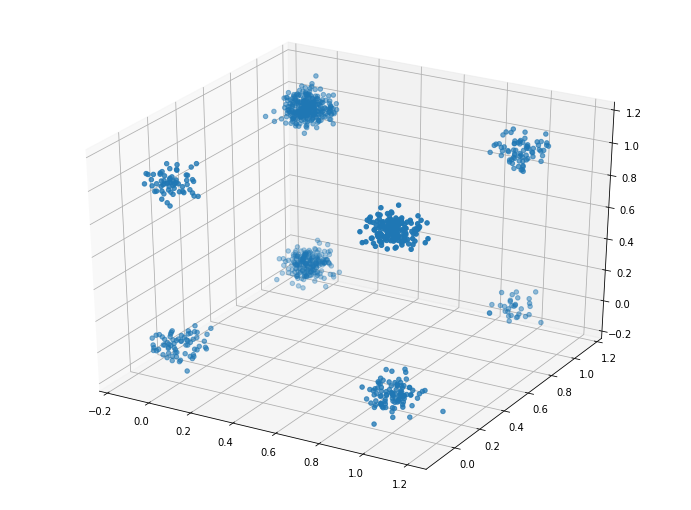

In [195]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z)

In [206]:
from itertools import product

In [249]:
# def H(x):
#     return x.T @ weights @ x - bias.T @ x


def H(x):
    vals = {
        (0, 0, 0): -1,
        (0, 0, 1): -3,
        (0, 1, 0): -3,
        (0, 1, 1): 5,
        (1, 0, 0): 3,
        (1, 0, 1): -3,
        (1, 1, 0): -1,
        (1, 1, 1): 1,
    }
    return vals[tuple(x)]


def unnormalized_likelihood(x):
    is_marginal_lik = any([el == ... for el in x])
    if is_marginal_lik:
        unnormalized_lik = 0
        for config in product(*[[0, 1] if el == ... else [el] for el in x]):
            config = np.array(config)
            unnormalized_lik += np.exp(H(config))
    else:
        unnormalized_lik = np.exp(H(x))
    return unnormalized_lik


def likelihood(x):
    """
    Must have the dimensionality of the data observations. To marginalize, put ellipses (...)
    in the elements over which you wish to marginalize.
    """
    numerator = unnormalized_likelihood(x)
    
    denominator = 0
    for config in product([0, 1], repeat=len(x)):
        config = np.array(config)
        denominator += np.exp(H(config))
    return numerator / denominator


def conditional_likelihood(x, cond: dict):
    joint = np.array(x)
    for index, val in cond.items():
        if isinstance(joint[index], int):
            raise
        joint[index] = val
        
    evidence = [cond.get(i, ...) for i in range(len(x))]
    
    return unnormalized_likelihood(joint) / unnormalized_likelihood(evidence)

In [250]:
# P(x_1 = 1 | x_2 = 2) = P(x_1 = 1, x_2 = 2) / P(x_2 = 2)

In [251]:
x = np.array([1, ..., ...])

likelihood(x)

0.13492854264366042

In [252]:
conditional_likelihood(x, cond={2: 0})

0.9799882683585315

In [ ]:
P(x_1 = 1) = P(x_1)

In [46]:
# lets generate data

n_outputs = 10
n_points = 100
data = np.random.binomial(n=1, p=.6, size=(n_points, n_outputs))
weights = np.random.randn(n_points, n_points)
np.fill_diagonal(weights, 0)
bias = np.random.randn(n_outputs)

In [ ]:
# now, derivation of gradient updates